# Correction TP1 : Multi-Layer Perceptron

# **I- Definition**

## ***1) The neuron***

The basic unit composant of a Neural network is called a **neuron**, or a **node**.  
A neuron performs a very straightforward operation : It receives several inputs $x_i$ and associates a **weight** $w_i$ to all of them.  
An **activation function** $f()$ is then applied on the weighted sum of these inputs plus a **bias** $b$ :

![neuron](https://docs.google.com/uc?export=download&id=1TDb-6flI--ILsgG8xag0yhGBqgce_K2D)

Consequently, for $N$ inputs, this neuron has $N+1$ parameters to be tuned, and the output of the neuron will be: 

<font color='red'>$$\boxed{y = f \left(\sum_{i=1}^{n} w_i \times x_i + b\right)}$$</font>

As we will see later, the Activation function is there to introduce non-linearity into the output of a neuron.  
Some classical Activation function are the **Sigmoid**: $$f(x) = \frac{1}{1 + e^{-x}}$$

or the **Rectified Linear Unit** (ReLu) : $$f(x) = max(0, x)$$

The following code displays these two standard activation functions, as well as their derivative. The cube of these derivatives are also displayed for information (see *I-3-a*, back propagation, for further details).

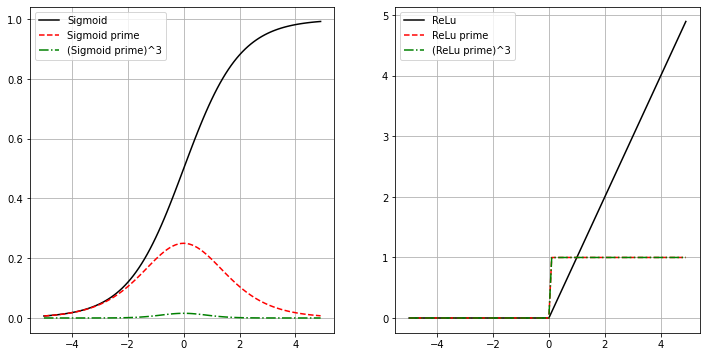

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

err = 0.0001

x = np.arange(100)/10-5
Sigmoid = 1/(1+np.exp(-x))
ReLu = np.maximum(0, x)

Sigmoidprime = Sigmoid*(1-Sigmoid)
Sigmoidprime3 = Sigmoidprime**3
ReLuprime = np.maximum(0, x)/(np.abs(x)+err)
ReLuprime3 = ReLuprime**3

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(x, Sigmoid, 'k-', label='Sigmoid')
plt.plot(x, Sigmoidprime, 'r--', label='Sigmoid prime')
plt.plot(x, Sigmoidprime3, 'g-.', label='(Sigmoid prime)^3')
plt.grid()
plt.legend();

plt.subplot(122)
plt.plot(x, ReLu, 'k-', label='ReLu')
plt.plot(x, ReLuprime, 'r--', label='ReLu prime')
plt.plot(x, ReLuprime3, 'g-.', label='(ReLu prime)^3')
plt.grid()
plt.legend();

\\

$$ \color{red}{\boxed{ \begin{align} &\underline{ \text{ SUMMARY: a neuron contains}} \\ 
&\text{- a linear tunable part (weights, bias)} \\ 
&\text{- a nonlinear non-tunable part (activation function)}
 \end{align}}}$$
<br>
Note that a Linear Regression model, as the one seen in the previous course, is in fact a single neuron with no activation function (or the identity one).

## ***2) The Multi-Layer Perceptron (MLP)***

A **multi-layer perceptron (MLP)** is a **feedforward network** which consists of several layers of neurons, in which each layer is fully connected to the following one.  Each neuron in these layers will receive several inputs, and will compute the previous equation with their own set of weights and a bias. Here, **fully connected layers** are displayed, where **neurons of the first layer are all connected to the second one**. Consequently, for $P$ neurons with $N$ inputs (either the initial inputs, or ones from a previous layer), this layer will contain $(N+1)P$ parameters to be tuned. Note that the very first layer is called **Input layer**, and is usually only dedicated to normalize data.

![neuron](https://docs.google.com/uc?export=download&id=10N9GIQuCdHOJPIE0K5S3ySfe096J6RL1)



---

**EXERCISE 1**

**1a)** How many parameters are contained in the hidden layer of the fully connected network displayed? How many for the output layer? 

<font color='blue'> Solution of **1a)** is: 
- The input layer has $4$ inputs, and the hidden layer contains $5$ neurons, so it contains $(4+1) \times 5 = 25$ parameters.
- The output layer is a single neuron with $5$ inputs, so it contains $(5+1) \times 1 = 6$ parameters.
- As a result, such a simple network already contains $31$ parameters to be tuned. This is a **non-linear parametric** model which has theoretically much more capabilities than most of traditional linear regression models. 
</font>

---

## ***3) Training a Multi-Layer Perceptron***

### ***a) Gradient Descent (GD)***

The process by which a Multi-Layer Perceptron is trained is called the **gradient descent**, which consists in the minimization of a cost function $ \mathcal{L}()$ depending on the model's parameters $p$. For a parameter $p$ of the network, the gradient $\frac{\partial \mathcal{L}}{\partial p}$ is computed. The parameter $p$ is then updated in the direction of the gradient with a relaxation term $\alpha$ (called the **learning rate**), so that 

<font color='red'>$$\boxed{\text{GD update: }p_{new} = p - \alpha \frac{\partial \mathcal{L}}{\partial p}}$$</font>

---

**EXERCISE 2**

The **learning rate** is critical in machine learning, because controlling the **gradient descent**, i.e. the search of the **optimal parameters** $p^*$ minimizing the cost function $\mathcal{L}(p)$. To gain experience on how the learning rate affects results, a synthetic cost function depending on two parameters $p_1$ and $p_2$ is considered:

$$\mathcal{L}(p_1, p_2) = sin\left(p_1^2 + [p_2/1.2]^2\right)  - 0.5e^{-[(p_1+2)^2 + 2(p_2-1.5)^2] } - 2e^{-[(p_1+0.5)^2 +(p_2+0.5.5)^2] } $$

Gradients of this function are known, but not explicitely given here. The function $\mathcal{L}$ and its gradients $\frac{\partial \mathcal{L}}{\partial p_i}$ are hard coded in the following program. The cost function is also displayed.

A **gradient descent** is coded, for which three parameters can be changed:
- The number of iteration `Niter` of the gradient descent
- The initial point in the 2D parameter space `(P1gd, P2gd)`. Note that the gradient descent algorithm is just updating these two values, according to the previous formula.
- The learning `lr` controlling the parameters' update

**2a)** Let's start with `Niter = 0` to avoid GD, and only display the function. Just by looking at the figure, what are the optimal parameters $p_1^*$ and $p_2^*$? 

<font color='blue'> Solution of **2a)** is: Roughly, the minimum of the loss function is obtained for the parameters $p_1^* \approx -0.3$ and $p_2^* \approx -0.3$.</font>

**2b)** Now, the gradient descent will be employed to search for the optimal parameter automatically. Set the GD parameters so that `Niter = 40`, `P1gd = 0`, `P2gd = 1.5` and `lr = 0.1`. What are the optimal parameters? How do you describe this search? What could you propose to accelerate this optimization?

<font color='blue'> Solution of **2b)** is: The optimal parameters given by the GD are $p_1^* \approx -0.33$ and $p_2^* \approx -0.37$. It is noticed that the GD follows the gradient so that the descent is normal to the iso-contour of the Loss function. To improve this descent, several solutions are possible:
-  a better initial point could be chosen, yet in practice it is difficult to have good guess, especially in large dimensions. Often, initlization is randomized.
- Since the descent is almost in the optimal direction, less steps could be performed. To do so, the learning rate could be increase.</font>

**2c)** Apply your solution by setting this parameter value to `0.3`. What do you conclude? Further increase this value to `0.5`. What happens now? Same question if further increased to `0.8`?

<font color='blue'> Solution of **2c)** is: Using a larger learning rate `lr = 0.3` **reduced significantly the number of steps** to reach the optimal solution. However, if increased too much, for example `lr = 0.5`, the algorithm is never converging, because trapped into a **bounce-back scenario**: the aglorithm is stuck between two values, going from one to another, without possibilities for escaping. Note that **none of these two values are the optimal parameters !** If you are curious and switch to even larger values, such as `lr = 0.8` or more, the algorithm is **diverging**.</font>

**2d)** Set back the parameters to `Niter = 60` and `lr = 0.1`, but now initialize the search in a different location of the parameters space, for instance `P1gd = -0.5`, `P2gd = 1.5`. What happens? Propose ideas to fix this problem (**it is not asked to implement these solutions**).

<font color='blue'>Solution of **2d)** is: The gradient descent is converging, but towards a **local minimum**, not a global one. Note that for deep neural networks, many local minima exist, and its not possible to reach the global one. This is a common problem to all **non-convex optimization** problem. As a comparison, Linear Regression is a convex problem for which only one optimum is obtained.</font>

Consequently for deep learning, a "good" local minimum is searched. To avoid being stuck in "not good" minima, several solutions may exist. At least two types of method can be considered:
- Adjust the learning rate, for example with kicks from time to time, to get out of local minima. This yields to [**cycle learning rate**](https://arxiv.org/pdf/1506.01186.pdf), where the parameters is increased by a scheduler during the gradient descent.
- Randomize the process: this can be achieved easily by choosing several initializations and redoing the process.  In practice, this is achieved by evaluating the loss on a random subset of the data, which slightly changes the gradient direction from one step to the other: this is the main idea behind the **Stochastic Gradient Descent (SGD)**
- Modifications of the SGD method: when using Stochastic Gradient Descent, the **gradient update is performed on small batches**. As the gradient estimate changes from batch to batch, it leads to slow convergence time. Some methods allow overcoming those issues by adding momentum terms (windowed averages of the gradient history). This performs better as it eliminates some of the problems associated with noisy gradients.
- More advanced methods use **one learning rate per parameter**. In the previous example, this means using  learning rates $\alpha_1, \alpha_2$ for parameters `(p_1, p_2)`. This technique adapts the learning rate to the parameters, performing smaller updates (i.e. low learning rates) for parameters associated with frequently occurring features, and larger updates (i.e. high learning rates) for parameters associated with infrequent features. A nice recap on the most common algorithms is found in [**this post by S. Rudder**](https://ruder.io/optimizing-gradient-descent/index.html
).

---




iter = 1, P1gd = -0.527, P2gd = 1.535 and the Loss is L = 0.90316
iter = 2, P1gd = -0.566, P2gd = 1.594 and the Loss is L = 0.83752
iter = 3, P1gd = -0.627, P2gd = 1.692 and the Loss is L = 0.66211
iter = 4, P1gd = -0.723, P2gd = 1.855 and the Loss is L = 0.20534
iter = 5, P1gd = -0.871, P2gd = 2.100 and the Loss is L = -0.64973
iter = 6, P1gd = -1.015, P2gd = 2.321 and the Loss is L = -1.01737
iter = 7, P1gd = -1.010, P2gd = 2.296 and the Loss is L = -1.01994
iter = 8, P1gd = -1.024, P2gd = 2.299 and the Loss is L = -1.02132
iter = 9, P1gd = -1.031, P2gd = 2.290 and the Loss is L = -1.02251
iter = 10, P1gd = -1.041, P2gd = 2.285 and the Loss is L = -1.02377
iter = 11, P1gd = -1.050, P2gd = 2.278 and the Loss is L = -1.02514
iter = 12, P1gd = -1.060, P2gd = 2.272 and the Loss is L = -1.02664
iter = 13, P1gd = -1.071, P2gd = 2.265 and the Loss is L = -1.02831
iter = 14, P1gd = -1.082, P2gd = 2.257 and the Loss is L = -1.03015
iter = 15, P1gd = -1.094, P2gd = 2.249 and the Loss is L = -1

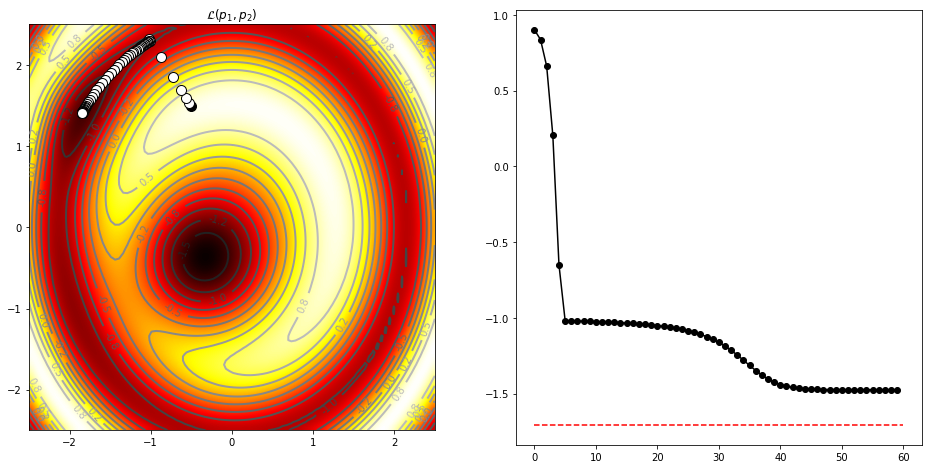

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from random import uniform
%matplotlib inline

# 2D model or parameter p1 and p2
N = 100
x = 5*(np.linspace(0, 1, N)-0.5)
p1, p2 = np.meshgrid(x, x)
# Loss function depending on the parameter's model
Loss = np.sin(p1**2 + (p2/1.2)**2)  - 0.5*np.exp(-((p1+2)**2 + (p2-1.5)**2)/0.5) - 2*np.exp(-(p1+0.5)**2 - (p2+0.5)**2)
Lmin = np.amin(Loss) # Minimum of the loss function

# Display the loss function
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
fig, ax = plt.subplots(figsize=(16, 8))
ax1=plt.subplot(1, 2, 1)
im = imshow(Loss,cmap=cm.hot, interpolation="bicubic", origin="lower", extent=[-2.5,2.5,-2.5,2.5]) # drawing the function
# adding the Contour lines with labels
cset = contour(p1, p2, Loss,np.arange(-2,2,0.25),linewidths=2,cmap=cm.gray)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
#colorbar(im) # adding the colobar on the right
# latex fashion title
title('$\mathcal{L}(p_1, p_2)$')

# Choose an initial point
P1gd = -0.5
P2gd = 1.5
ax1.plot(P1gd,P2gd, 'k', marker='o',  lw = 2, markersize = 10, markerfacecolor = 'black')

# Gradient descent
Niter = 60
lr = 0.1
LossEval = np.zeros(Niter)
for k in range(Niter):
  # Gradient computation
  dLdP1 = 2*P1gd*np.cos(P1gd**2+(P2gd/1.2)**2) -(-(2+P1gd)*np.exp(-((P1gd+2)**2+(P2gd-1.5)**2)/0.5))/(0.5) +4*(P1gd+0.5)*np.exp(-(P1gd+0.5)**2-(P2gd+0.5)**2)
  dLdP2 = (2*P2gd*np.cos(P1gd**2+(P2gd/1.2)**2))/(1.2**2) -(-(-1.5+P2gd)*np.exp(-((P1gd+2)**2+(P2gd-1.5)**2)/0.5))/(0.5) +4*(P2gd+0.5)*np.exp(-(P1gd+0.5)**2-(P2gd+0.5)**2)

  # Parameter update
  P1gd = P1gd - lr*dLdP1
  P2gd = P2gd - lr*dLdP2
  # Plot the descent
  ax1.plot(P1gd,P2gd, 'k', marker='o',  lw = 2, markersize = 10, markerfacecolor = 'white')

  # Loss evaluation
  LossEval[k] = np.sin(P1gd**2 + (P2gd/1.2)**2)  - 0.5*np.exp(-((P1gd+2)**2 + (P2gd-1.5)**2)/0.5) - 2*np.exp(-(P1gd+0.5)**2 - (P2gd+0.5)**2)

  # Print data
  kiter=k+1
  print('iter = %1.0f, P1gd = %1.3f, P2gd = %1.3f and the Loss is L = %1.5f' % (kiter, P1gd, P2gd, LossEval[k]))

ax2=plt.subplot(1, 2, 2)
ax2.plot(LossEval, 'k-', marker='o')
ax2.plot([0, Niter], [Lmin, Lmin], 'r--')

plt.show()

Thus, this simple example highlighted the difficulty of training neural networks, which falls in the very large field of **non-convex optimization**. Note that in the previous example, the loss function was explicitely given and 2D. For neural networks, the loss landscape is of course not known, and very high-dimensional ($~\gt 10^5$ in most deep neural networks). Literature has produced multiple aglorithms (SGD, RMSprop, Adam etc.) and training techniques (decaying and cyclic learning rate etc.), not detailed in this lecture. However, almost all training strategies for deep neural networks are based on **gradient-based optimisation**, which rises another major difficulty when training such models.

\\

$$ \color{red}{\boxed{ \begin{align} &\underline{ \text{ SUMMARY:}} \\ 
&\text{- MLP implies a non-convex optimization in a very high dimensional space} \\ 
&\text{- Learning rate is critical: it is a trade-off between "learning fast", "ensure stability" and "good precision"} \\
&\text{- Can converge to a local minimum (learning rate kicks, advanced optimizers)}
 \end{align}}}$$

### ***b) Stochastic, Batch, and mini-Batch gradient descents***

Note that the gradients of the loss function obtained in the previous example depend on the input $x$ and output target $y^t$. Consequently, when looking at several samples from the training dataset, various directions of the gradient will be produced. If the update of the model's parameters is performed for each sample, it might lead to a noisy descent (see figure below, middle):  \\
**Stochastic Gradient Descent (SGD)**:
1.    for the i-th input $x_i$, compute the gradients $D_{j,i} = \frac{\partial \mathcal{L}}{\partial p_j}(x_i)$
2.    update the parameter $p_j$ so that $p_j = p_j - \alpha_j D_{j,i}$

To avoid a too noisy descent, a better solution would be to **average the descent directions over the whole dataset** (see figure below, top), yet it is usually impossible in practice because of memory issues. Moreover, it would be costly, since one iteration of the network weights would require the computation of all gradients for all samples. \\
**Gradient Descent (GD)**:
1.    for all inputs $x_i$ with $i=1..N$, compute the gradients $D_{j,i} = \frac{\partial \mathcal{L}}{\partial p_j}(x_i)$
2.    update the parameter $p_j$ so that $p_j = p_j - \alpha_j \frac{1}{N} \sum_{i=1}^N D_{j,i}$

A compromise between these two approaches is the **mini-batch gradient descent** (see figure below, bottom). A small **batch** is a collection of a small number of samples. **The gradient descent will be performed only after the batch is evaluated**, averaging the descent over the samples of the batch. The **batch size** $N_B \ll N$ is the number of samples used to approximate the gradient: a low batch size will produce a noisy optimization process (similar with SGD), whereas a large batch size will create memory and cost issues (similar with GD). In practice, the largest batch size allowed by the GPU memory is chosen. \\
**Mini-Batch Gradient Descent (M-BGD)**:
1.    for all inputs $x_i$ from the mini-batch of size $N_B$, compute the gradients $D_{j,i} = \frac{\partial \mathcal{L}}{\partial p_j}(x_i)$
2.    update the parameter $p_j$ after the mini-batch evaluation, so that $p_j = p_j - \alpha_j \frac{1}{N_B} \sum_{i=1}^{N_B} D_{j,i}$

![neuron](https://edgeaiguru.com/assets/images/gradient-descent-variants/batch-stochastic-mini-gd.png)

During the training phase, the learning algorithm will operate mini-batch after mini-batch until the whole dataset has been covered. This step is called an **epoch**. Then, the optimization is continue several times: many epochs are performed, meaning that the whole dataset is reused several times during the optimization process. It is common to see in the literature models trained for a large number of epochs, going from 10 to 1000, or even larger. Of course, this number strongly depends on, among others:

- the number of samples in the training dataset
- the size of the neural network, i.e. the number of parameters to be tuned
- the intrinsic difficulty of the problem
- the desired accuracy level expected from the network (more accurate often requires more epochs).

### ***c) Back propagation*** 

Another difficulty in neural networks is therefore to compute all the derivatives $\frac{\partial \mathcal{L}}{\partial p}$ in an efficient way, in particular when the number of parameters $p$ is very high (for instance, VGG16, a well known deep learning network for classification, contains $138$ millions of parameters to be tuned). This is achieved using the [BackPropagation](https://www.nature.com/articles/323533a0) algorithm.  

Thus for **supervised learning**, for every samples in the training set $\{x, y\}$, the output of the MLP is computed and compared to the true value $\{x, y^t\}$, often called **ground truth** or **target**. A measure of this error is provided by the **loss function**. The definition of this loss function $ \mathcal{L}()$ is crucial in a machine learning problem, and depends strongly on the problem (regression, classification etc.). A typical example for regression problem is the **Mean Square error (MSE)**, defined as

$$ \mathcal{L}(y, y_t) = \frac{1}{N}\sum_{i=1}^N |y_i - y_i^t|^2 $$

The loss function measuring this error is then propagated through the whole network : the gradient of this loss in respect of each weight is computed with the [chain rule](https://en.wikipedia.org/wiki/Chain_rule) and every weights are updated accordingly. As a result, the **parameters of the neural network are optimized in order to minimize the error compared with target outputs**.


---
**EXERCISE 3**

In this example, a simple 2-layer MLP with only one input $x$ and output $y$ is considered. The hidden state is denoted $h$, and the weight and bias of the $i$-th neuron are $w_i$ and $b_i$ respectively. The loss function is the MSE, which here simplifies as $\mathcal{L}(y-y^t) = (y-y^t)^2$ since $y$ is a single scalar value. Let's note $z_i$ the quantity produced by the neuron just before the activation function, so that the $i$-th neuron is outputting the value $f_i(z_i)$.

![Network-2layer](https://drive.google.com/uc?id=1vvzVosTkMdeF1R6BS_9jALHdTcjrbHli&export=download)

<font color='blue'> </font>
**3a)** Write the feedforward equation of the first neuron.

<font color='blue'>  Solution of **3a)** is: The forward equation is $h = f_1(w_1 \cdot x+b_1)$. </font>

**3b)** Write the feedforward equation for the second neuron

<font color='blue'>Solution of **3b)** is: The forward equation is $y = f_2(w_2 \cdot h+b_2) = f_2(w_2 \cdot f_1(w_1 \cdot x+b_1)+b_2)$</font>

**3c)** Write the derivative of the loss function with respect to the output $y$:

<font color='blue'>Solution of **3c)** is:

$$ \frac{\partial \mathcal{L}}{\partial y} = 2(y - y^t)$$</font>

**3d)** Write the derivative of the loss $\mathcal{L}$ with respect to the parameters of the **second** layer.

<font color='blue'>Solution of **3d)** is: As a reminder $z_2 = w_2 \cdot h+b_2$, so that $y=f_2(z_2)$. Thus, the chaine rule implies that $ \frac{\partial  \mathcal{L}}{\partial w_2} = \frac{\partial  \mathcal{L}}{\partial y} \frac{\partial f_2}{\partial z_2}\frac{\partial z_2}{\partial w_2}$. The first term was obtained in **3c)**, the second is the derivative of the activation function $f_2()$, and the third term is simply $h$, so that

$$ \frac{\partial \mathcal{L}}{\partial w_2} = 2(y - y^t)f_2'(z_2)h$$</font>

<font color='blue'>
and similarly 

$$ \frac{\partial  \mathcal{L}}{\partial b_2} = 2(y - y^t)f_2'(z_2)$$</font>

<font color='blue'>
Note that in the literature, the common quantity is denoted $\delta_2 = 2(y - y^t)f_2'(z_2)$, so that 

$$\frac{\partial \mathcal{L}}{\partial w_2} = \delta_2 h ~~\text{ and }~~  \frac{\partial \mathcal{L}}{\partial b_2} = \delta_2$$ </font>


**3e)** Write the derivative of the loss $\mathcal{L}$ with respect to the parameters of the **first** layer.

<font color='blue'> Solution of **3e)** is: A similar procedure following the chaine rule is employed, from the output of the network towards the considered layer (back propagation), so that 

$$ \frac{\partial \mathcal{L}}{\partial w_1} = \frac{\partial \mathcal{L}}{\partial y} \frac{\partial f_2}{\partial z_2}\frac{\partial z_2}{\partial h}\frac{\partial h}{\partial z_1}\frac{\partial z_1}{\partial w_1} = 2(y - y^t)f_2'(z_2) w_2 f_1'(z_1)x = \delta_2 w_2 f_1'(z_1)x = \delta_1 x$$</font>

<font color='blue'>
and 
</font>

<font color='blue'> 
$$ \frac{\partial \mathcal{L}}{\partial b_1} =  \frac{\partial \mathcal{L}}{\partial y} \frac{\partial f_2}{\partial z_2}\frac{\partial z_2}{\partial h}\frac{\partial h}{\partial z_1}\frac{\partial z_1}{\partial b_1} = 2(y - y^t)f_2'(z_2) w_2 f_1'(z_1) = \delta_1$$

where $\delta_1 = \delta_2 w_2 f_1'(z_1)$.</font>

**3f)** What do you conclude? What could happen if more neurons were connected one after the other?

<font color='blue'>
Solution of **3f)** is: All gradients of the network can be evaluated only by concatenating known simple derivatives, starting from the end of the network and back propagating towards the considered layer. Typically, 

$$ \delta_{k-1} =  \delta_k w_k f'_{k-1}(z_{k-1})$$</font>

<font color='blue'>
If more layers are added, the derivatives associated with the first layers will introduce numerous multiplication of $f'_k(z_k)$. Looking at the sigmoid function, $\prod_k f'_k(z_k)$ will tend towards the null function everywhere: this is called the **vanishing gradient issue**: the gradient information is lost when back-propagated in a deep network.

However using a **ReLu***, its derivative is always 0 or 1, so $\prod_k f'_k(z_k)$ as well: **ReLu avoids the vanishing gradient issue**. Note however that this function is not differentiable at $z=0$, yet in practice it has a little impact on the results.
</font>

---

\\

$$ \color{red}{\boxed{ \begin{align} &\underline{ \text{ SUMMARY:}} \\ 
&\text{- Data flows from input to output} \\ 
&\text{- Gradients flow from output to input} \\ 
&\text{- For deep architectures (i.e. many layers), gradient information can vanish} \\ 
&\text{- No vanishing gradient when ReLu is used}
 \end{align}}}$$

# **II - TP with playground**

Now that the fundamentals of a Multi-Layer Perceptron are introduced, let's try to get a handle on how to train them, and how they react to different datasets and hyperparameters with the website [playground.tensorflow.org](https://playground.tensorflow.org).

## ***1) Gradient Vanishing***

In this part, we will work on the **circular dataset** of Playground, without noise on the data (noise = 0). Assign the following values to the hyperparameters and options offered by the interface :
- **Learning Rate** = 0.03
- **Activation** = Sigmoid
- **Regularization** = None
- **Batch Size** = 20 (20 samples used per gradient update)



---

**Exercise 4**

**4a)** Start by using a **single hidden layer**, with **2 neurons**, and look at the resulting solution after few epochs. The capacity of the model seems too low for this problem.   Vary the number of neurons on the hidden layer, and observe the evolution of the separator. Observe also the synaptic weights: some should tend towards 0  

<font color='blue'> 
(Solution : 3 neurons is enough to converge. With more, some neurons are useless and their associated weights learned are close to 0)</font>

**4b)** What happens if you switch to a batch size $N_B=1$ (SGD)?

<font color='blue'> 
(Solution : The training is very noisy, almost unstable)</font>

**4c)** Add a **second hidden layer**. What's going on with the convergence speed of the network now ?  Try to increase the learning rate to counterbalance this effect. What is the optimal learning rate here? 

<font color='blue'>
(Solution : It's slower to converge, a higher Learning Rate can help 0.3 for example. The optimal one when starting from scratch is $1.0$)
</font>

**4d)** Add a **third hidden layer**. What is happening now ?  Can you still find a Learning Rate that still achieves convergence ? 

<font color='blue'> 
(Solution : A higher Learning Rate is not enough now)
</font>

**4e)** Replace the sigmoid activation function with a **reLU function**. What is happening ?  

<font color='blue'> 
(Solution, the network converge better with a Relu activation for the hidden layers. This is due to the [vanishing gradient](https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484) when using a sigmoid activation. )
</font>

---



## ***2) Regularization***

The effect of the **regularization** is to add a penalty to the loss function equal to the sum of the absolute values of the weight for the L1 regularization (similar to **Lasso**), or the sum of the squared weights for the L2 (similar to **Ridge**). In this section, we will try to grasp the idea of how regularization works to prevent overfitting. We will work again on the circular data, but with some noise on the data (**noise = 50**).



---

**Exercise 5**

**5a)** Start by setting up a high-capacity network (depth = 7, with 6 hidden layers plus the last one) with 8 neurons per layer, the maximum in playground and a ReLu activation with a learning rate 0.1. You should gradually observe all signs of **overfitting** when the network starts to **memorize** the data in the training set and performs poorly in the test set.  

**5b)** Add a regularization term L2. Try to establish which interval of values is efficient to reduce the overfitting. Observe the evolution of synaptic weights as the number of epochs is increasing. 

<font color='blue'> 
(Solution : 0.003 or 0.01 is good. Below this values won't have enough effects and higher will prevent the network to learn anything. We also observe that the weights learned by the network are lower than without regularization, as expected.)

*Note: you can also use the L1 regularisation, which will yield similar effects.* </font>


---



# **III - TP with Keras**

Many different Deep Learning libraries are available and free. In this course, we will use the well-known **Tensorflow**, and its high-level counterpart **Keras** (see the excellent book from Francois Chollet for further details on Keras). In particular, TensorFlow is still the **main framework used in industry**. This choice allows us to focus on the important concepts of Neural Network training and evaluation

Keep in mind that many other libraries exist, for instance  **PyTorch** and **PyTorch Lightning**, which is getting more and more popular, and now is **the first framework used in research** (about $60\%$ to $80\%$ of the papers are produced with Pytorch in the main AI conferences)

## ***1) Data generation***

Let's create a function to generate data similar to the playground circular dataset. As a reminder, points are randomly sampled in a 2D field. A rule has been set to paint those points, either in blue or red, with some noise. The goal is to find a surrogate model to classify these points as blue/red. Note that here the `seed()` is fixed to avoid that such a random dataset will vary everytime one is launching the program.

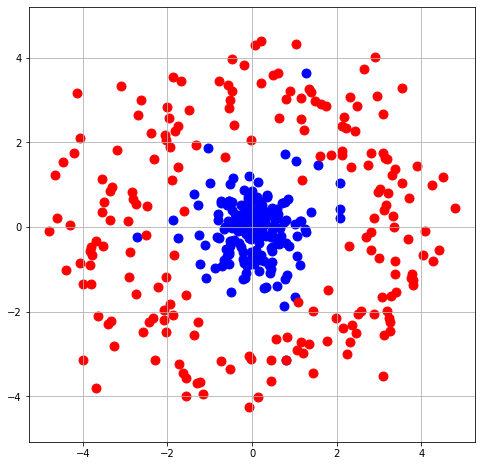

In [1]:
import numpy as np
def generateData(n):
  a = np.random.rand(n) * 2 * np.pi
  c1 = 1*np.random.normal(0, 1, n)*np.vstack((np.cos(a), np.sin(a)))

  b = np.random.rand(n) * 2 * np.pi
  c2 = (3.5+1*np.random.normal(0, 0.7, n))*np.vstack((np.cos(b), np.sin(b)))

  x = np.concatenate((c1,c2), axis=1)
  y = np.concatenate((np.zeros((n)),np.ones((n))),axis=0)
  
  return x, y

from matplotlib import pyplot as plt

np.random.seed(42)
x, y = generateData(200)

plt.figure(figsize=(8, 8))

plt.scatter(x[0][np.where(y == 0)], x[1][np.where(y == 0)], s=80, color='b')
plt.scatter(x[0][np.where(y == 1)], x[1][np.where(y == 1)], s=80, color='r')

plt.axis('equal')
plt.grid()

**EXERCISE 6**

Before doing any machine learning, getting a thorough understanding of the current problem is crucial. Here, without machine, let's try to evaluate intuitive estimators:

**6a)** Considering this problem as a general binary classification, what would be the minimal accuracy that a method should reach?

<font color='blue'> 
(solution of **6a)**: a naive estimator outputting always 'blue' would have already a $50\%$ accuracy (number of correct answer compared with the total predictions made). Any model should therefore exceed this accuracy.)</font> 

<font color='blue'> 
It is always a good practice to first look at data before doing any ML. Here, looking at the sample distribution, a simple estimator can be proposed, for instance. </font> 

<font color='blue'> 
$$\text{if}~~R = \sqrt{x^2+y^2} < 2 ~~\text{then predict 'blue'}$$

The code below evalute such a simple estimator, leading to an accuracy of $96.75\%$. This maximal accuracy is not $100\%$ because of the noise in data. In fact, even Deep Learning cannot do better than this (otherwise it means leanrt the noise, which means overfitting which is not what we want)
</font> 

With this strategy, an accuracy of 96.750000 is obtained


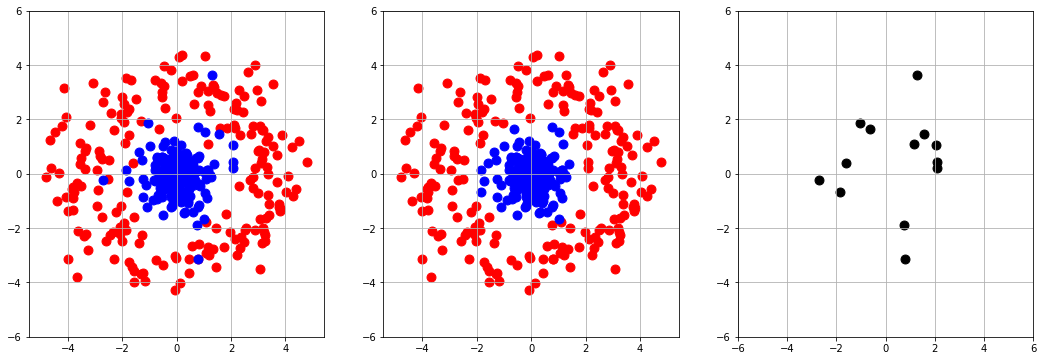

In [2]:
# The propose criterion is:
r = np.sqrt(x[0]*x[0] + x[1]*x[1])
Rcrit = 2.

# This code automatically compute your estimator (like this : r < Rcrit), and display results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

ax1.scatter(x[0][np.where(y == 1)], x[1][np.where(y == 1)], s=80, color='r')
ax1.scatter(x[0][np.where(y == 0)], x[1][np.where(y == 0)], s=80, color='b')
ax1.axis('equal')
ax1.grid()
ax1.set_ylim([-6, 6])
ax1.set_xlim([-6, 6])

ax2.scatter(x[0][np.where(r > Rcrit)], x[1][np.where(r > Rcrit)], s=80, color='r')
ax2.scatter(x[0][np.where(r < Rcrit)], x[1][np.where(r < Rcrit)], s=80, color='b')
ax2.axis('equal')
ax2.grid()
ax2.set_ylim([-6, 6])
ax2.set_xlim([-6, 6])

ax3.scatter(x[0][np.where((r < Rcrit )*y)], x[1][np.where((r < Rcrit )*y)], s=80, color='k')
ax3.scatter(x[0][np.where((r > Rcrit )*(1-y))], x[1][np.where((r > Rcrit )*(1-y))], s=80, color='k')
ax3.grid()
ax3.set_ylim([-6, 6])
ax3.set_xlim([-6, 6])

acc = 100 - (np.sum((r < Rcrit)*y) + np.sum((r > Rcrit)*(1-y)))/y.shape[0]*100
print('With this strategy, an accuracy of %f is obtained' %acc)


## ***2) Neural network initialization in Keras***

We can now try to reproduce the previous results with Keras. The objective is to get familiar with it, to be used in the next lectures exporing deep learning techniques. First, we need to import Keras (`import keras`), a high level library that wraps TensorFlow.

Here you can find the [**official Keras documentation**](https://keras.io/).

In [3]:
%tensorflow_version 1.x
import keras
#We shut down tf 2.0 deprecated warning
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

TensorFlow 1.x selected.


Using TensorFlow backend.


In keras, to define a sequential model, we first have to call the function **Sequential()** that will return an object, stored in the variable "model" here.  
We can then add layer to this object with the function **.add**.  

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 27        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 4         
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________





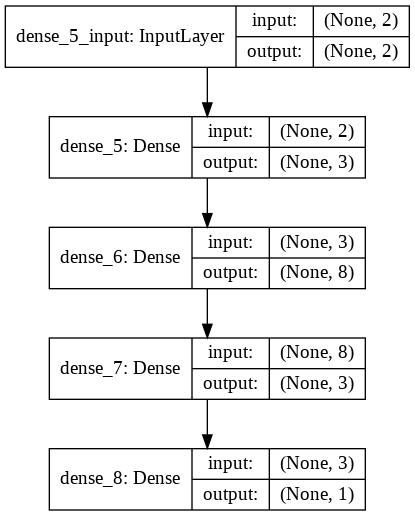

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras.utils.vis_utils import plot_model

model = Sequential()

###Hiddenlayers###
model.add(Dense(3, activation='tanh', kernel_regularizer=regularizers.l2(0.001), input_dim=2))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(3, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#################

model.add(Dense(1, activation='sigmoid'))

###Display the model (text mode)###
model.summary()

print('')
print('')
print('')

###Display the model (image mode)###
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Here, **1 hidden layers** have been added, with a **ReLu activation** and a **regularization L2** of $0.001$ to our model.  Note that a summary of the model can be obtained using `model.summary()` in text mode, or the `plot_model()` function in graphical mode.

---

**Question** Why ReLu activation functions are used for the first layers, whereas a sigmoid activation function is employed for the output layer?

<font color='blue'> 
Solution: As mentioned, ReLu activation functions are often used inside neural networks because limiting the **vanishing gradient issue**. However, the last output layer is here to provide the prediction. In a classification problem, a standard output is a value in the interval [0, 1], playing a role of probability. For that, the Sigmoid function is introduced to generate such a value in the desired interval.
</font> 

---


## ***3) Loss function and metrics***

### ***a) The binary cross-entropy loss function***
As every machine learning, a **loss function** has to be defined, to be used as a cost function during the training phase optimizing the network's weights. Here, the problem falls into a well popoular type of machine learning problem known as **classifiers**: the objective is to assigne a class (discrete values) to an input. Here, there are two classes, *blue* and *red*. 

These classes could be used as outputs of the network, however, no estimation of how confident is the model would be possible: outputting *blue*, either the network is completely right, or completely false. To provide a more grayish prediction, it is often prefered to output a **probability that the class** is blue for example. Consequently, the loss should evaluate how good/bad are the predicted probabilities.

\\

$$ \color{red}{\boxed{ \begin{align} 
&\text{For classifiers, the output is not the class, but the probability for each class} 
 \end{align}}}$$

 \\


For **binary classification**, the best loss function is the **Binary cross-entropy loss** when the output is in $[0, 1]$. It usually provides the best accuracy, except in specific problems, and is therefore used as default. Note that for multi-class classification or regression problems, other loss functions should be employed. In short, the goal is to predict the probability for a given $x$ to get the correct class $y$ based on the network model $\hat y = h(x ; {\bf w})$. This loss function (details are not required in this course, but additionnal information are given below for completeness and curiosity) writes:


$$\text{BCE}({\bf w}) = -\frac{1}{N}\sum_{i=1}^N  y_i log[h(x; {\bf w})] + (1-y_i) log[1-h(x; {\bf w})]$$

\\

$$ \color{red}{\boxed{ \begin{align} &\underline{ \text{ SUMMARY:}} \\ 
&\text{- For classifiers, the output is not the class, but the probability for each class} \\ 
&\text{- For classifiers, the loss should measure dissimilarities between the predicted and true PDF} \\ 
&\text{- This is achieved by minimizing the cross-entropy}
 \end{align}}}$$

 \\



---



**Information below are for curiosity and are not required in this course since we will mainly focus on regression tasks**

<font color='blue'> 
For a binary class problem, the output is either $0$ (blue) or $1$ (red), so that the problem is

$$P(\hat y = 0 | x) \approx 1 ~\text{if}~ y=0$$
$$P(\hat y = 1 | x) \approx 1 ~\text{if}~ y=1$$
</font> 
<font color='blue'> 
but also

$$P(\hat y = 0 | x) \approx 0 ~\text{if}~ y=1$$
$$P(\hat y = 1 | x) \approx 0 ~\text{if}~ y=0$$
</font>
<font color='blue'>  
which can be written in a compact form

$$ P(\hat y | x) = h(x; {\bf w})^y [1-h(x; {\bf w})]^{1-y} $$
</font> 
<font color='blue'> 
This can be achieved by maximizing the likelihood for all training samples indexed by $i$:

$$ \mathcal{L}({\bf w}) = P(\hat y_1, ., \hat y_i, . \hat y_N | x_1, ., x_i, . x_N) = \prod_{i=1}^N P(\hat y_i | x ; {\bf w})  = \prod_{i=1}^N h(x_i)^{y_i} [1-h(x_i)]^{1-y_i}  $$
</font> 
<font color='blue'> 
Taking the negative (to be minimized) log-likelihood (for practical and stability reasons) normalized by the number of samples (for normalization purposes), provides the **Binary Cross-Entropy (BCE)** loss function:
</font> 
<font color='blue'>$$\boxed{\text{BCE}({\bf w}) = -\frac{1}{N}\sum_{i=1}^N  y_i log[h(x; {\bf w})] + (1-y_i) log[1-h(x; {\bf w})]}$$</font>
<font color='blue'> 
This loss function can be used in Keras using `loss='binary_crossentropy'` for binary classifiers. The name *binary* is because it is restricted to two-class problems (compared with multi-class problems), and *cross-entropy* because of its link with entropy distribution. 

As a brief explanation, for a distribution $p(y)$, the **entropy** is given by
</font> 
<font color='blue'> 
$$H(p) = - \sum_{i=1}^N p(y_i) log[p(y_i)]$$

which measures the *uncertainty* associated with a distribution. The same can be evaluated for a probability $p(y)$ compared with a reference distribution $q(y)$: this is the **cross-entropy**, written as
</font> 
<font color='blue'> 
$$H(p, q) = - \sum_{i=1}^N q(y_i) log[p(y_i)]$$

This cross-entropy is also associated with the more general **Kullback-Liebler divergence**, also used as loss function in multi-class classifiers, which measures how close a probabiliy $p$ (the network's prediction) is from a reference $q$ (the ground truth distribution). 
</font> 


---



### ***b) The accuracy metric***

In addition to the loss function, a **metric** can be defined to **evaluate the performance of the neural network**. This metric is NOT used to train (i.e. to optimize the weights of the neural network), but only to **display a user-friendly value to assess the network performance**: it allows the interpretation  much easier than the loss function. 
For instance, how one can juge if a classifier with a loss of $10^{-3}$ is good or not? How, if the associated metric **accuracy** is $98\%$: most of the time the network predictions will be considered as satisfying. Note that a random guess of the class, considering there are only two classes possible, would lead to an accuracy of $50\%$: a network model should at least reach better accuracy than $50\%$, a threshold impossible to evaluate with a loss function. In Keras, the metric `accuracy` can be defined through `metrics=['accuracy']`.

Here is the code to impose the optimizer (here a simple SGD, Stochastic Gradient Descent with a learning rate $0.03$), the loss and the metrics.

In [9]:
from keras import optimizers

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])


## ***4) Network setup***

Finally, the neural network model is defined and train (`fit`) in Keras by specifying:

1.   Batch size (`batch_size=10`)
2.   The number of epochs (`epochs=0.03`)

The number of **epochs** correspond to the number of time the complete dataset will be seen by the neural network during the training phase. The **batch size** corresponds to how many data are fed to the neural network before doing one optimization step (to averaged the gradient predictions, and ensure a more general minimum representative of the complete dataset). During the training, the loss and accuracy stored in `history` can be displayed as follows:


Epoch 1/20
400/400 [==============================] - 0s 436us/step - loss: 0.6955 - accuracy: 0.4850
Epoch 2/20
400/400 [==============================] - 0s 225us/step - loss: 0.6847 - accuracy: 0.6125
Epoch 3/20
400/400 [==============================] - 0s 231us/step - loss: 0.6708 - accuracy: 0.5875
Epoch 4/20
400/400 [==============================] - 0s 258us/step - loss: 0.6504 - accuracy: 0.6400
Epoch 5/20
400/400 [==============================] - 0s 223us/step - loss: 0.6235 - accuracy: 0.6775
Epoch 6/20
400/400 [==============================] - 0s 223us/step - loss: 0.5889 - accuracy: 0.7100
Epoch 7/20
400/400 [==============================] - 0s 227us/step - loss: 0.5442 - accuracy: 0.7375
Epoch 8/20
400/400 [==============================] - 0s 237us/step - loss: 0.4942 - accuracy: 0.7600
Epoch 9/20
400/400 [==============================] - 0s 277us/step - loss: 0.4228 - accuracy: 0.8225
Epoch 10/20
400/400 [==============================] - 0s 281us/step - loss: 0.388

Text(0, 0.5, 'Accuracy')

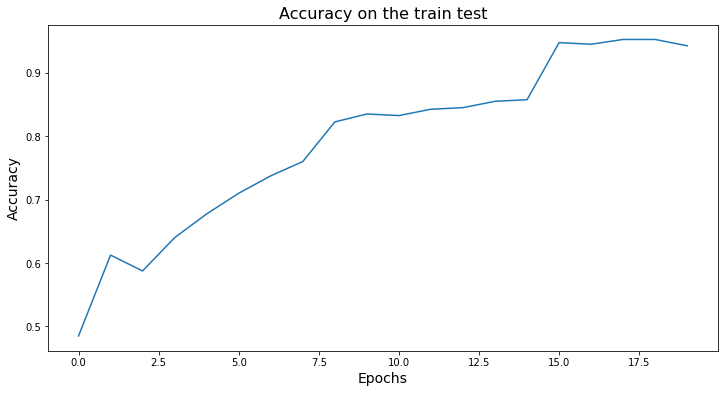

In [10]:
history = model.fit(np.transpose(x), y,  epochs=20, batch_size=10)

plt.figure(figsize=(12, 6))
plt.title('Accuracy on the train test', fontsize=16)
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)



## ***5) Network validation***

So far, the network has been optimized on the training dataset. No guarantee can be given for the performance on unseen data: optimizing too large networks on too small dataset could lead to **overfitting**. A way to ensure that the network is actually **learning rather than memorizing** is the validation/test phase. 

To do so, new samples are generated for the same problem, but not used for training. Then the network's predictions are tested on those unseen data: a proper network training should give similar loss/metric values for both the training and validation datasets.

The following code propose perform simple predictions of the network (i.e. obtaining its output when feed by new inputs `x_test`). This is done though `model.predict()` in Keras.

 On the test set, Loss = {loss:.5f} and Accuracy = {metric}


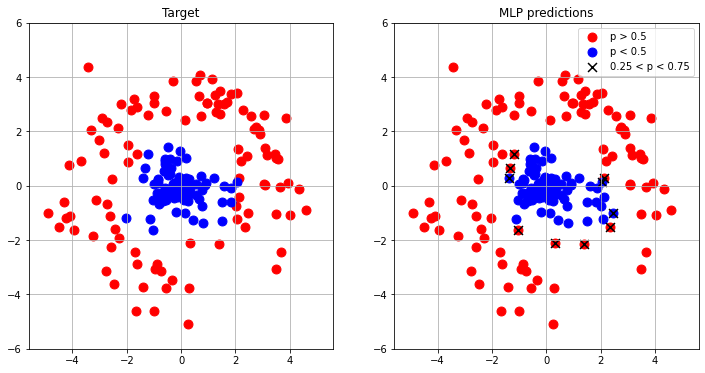

In [12]:
x_test, y_test = generateData(100)

# Prediction
output = model.predict(np.transpose(x_test))

print (" On the test set, Loss = {loss:.5f} and Accuracy = {metric}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.scatter(x_test[0][np.where(y_test == 1)], x_test[1][np.where(y_test == 1)], s=80, color='r')
ax1.scatter(x_test[0][np.where(y_test == 0)], x_test[1][np.where(y_test == 0)], s=80, color='b')
ax1.axis('equal')
ax1.grid()
ax1.set_ylim([-6, 6])
ax1.set_xlim([-6, 6])
ax1.set_title('Target')

red_cat = ax2.scatter(x_test[0, :][np.where(output[:,0] >= 0.5)], x_test[1, :][np.where(output[:,0] >= 0.5)], s=80, color='r')
blue_cat = ax2.scatter(x_test[0, :][np.where(output[:,0] <= 0.5)], x_test[1, :][np.where(output[:,0] <= 0.5)], s=80, color='b')
# Check the values where the MLP is not confident, here set to the probability P > 0.25 and P < 0.75)
unsure_cat = ax2.scatter(x_test[0, :][np.where( np.abs(output[:,0]-0.5) <= 0.25 )], x_test[1, :][np.where( np.abs(output[:,0]-0.5) <= 0.25 )], s=80, color='k', marker='x')
ax2.axis('equal')
ax2.grid()
ax2.set_ylim([-6, 6])
ax2.set_xlim([-6, 6])
ax2.set_title('MLP predictions')
ax2.legend((red_cat, blue_cat, unsure_cat), ('p > 0.5', 'p < 0.5', '0.25 < p < 0.75'))



---

## ***6) Conclusion***


Finally to summarize, here is the code to define the MLP in Keras :



```
%tensorflow_version 1.x 
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras import optimizers

###Define the network architecture###
model = Sequential()

model.add(Dense(3, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_dim=2))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(3, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model.add(Dense(1, activation='sigmoid'))

###Display the model (text mode)###
model.summary()

###Create the model with optimizer and loss###
model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

###Fit the model (TRAINING)###
history = model.fit(np.transpose(x), y,  epochs=20, batch_size=10)

###PREDICT FROM THE TRAINED MODEL###
output = model.predict(np.transpose(x_test))



```

